In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [406]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [407]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
89         1
54.4       1
77.8       1
80.2       1
88.7       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [408]:
pr.poverty_rate.replace('-', 0.0, inplace=True)

In [409]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [410]:
pr['poverty_rate'] = pr.poverty_rate.astype(float)

In [411]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [412]:
pr.groupby('Geographic Area').mean()

,poverty_rate
Geographic Area,
AK,18.678592
AL,20.611795
AR,22.963216
AZ,25.268071
CA,16.888371
CO,13.187773
CT,9.137500
DC,18.000000
DE,12.555844


**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [413]:
poverty_by_state = pr.groupby('Geographic Area').mean()

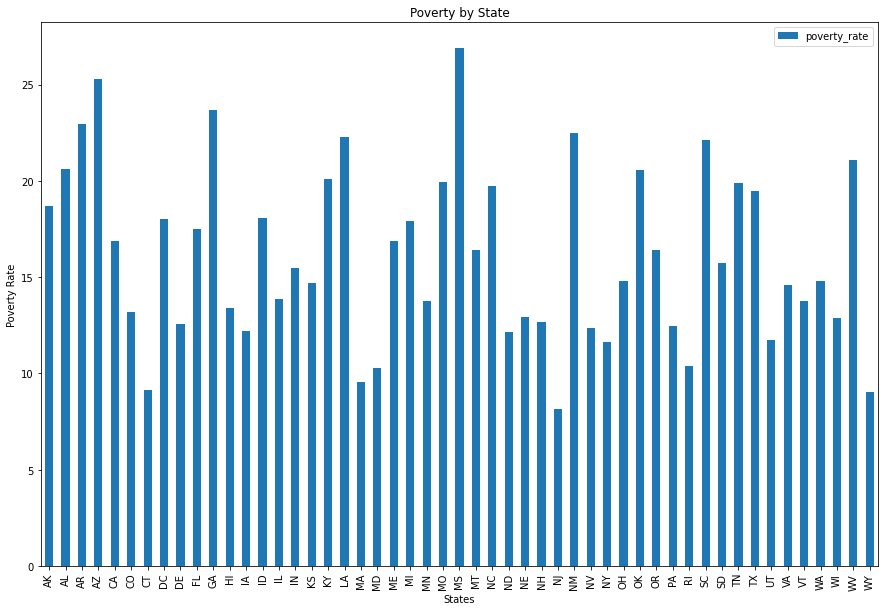

In [414]:
poverty_by_state.plot(kind='bar',
                      figsize=(15, 10),
                      title='Poverty by State',
                      xlabel='States',
                      ylabel='Poverty Rate')

plt.show()

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

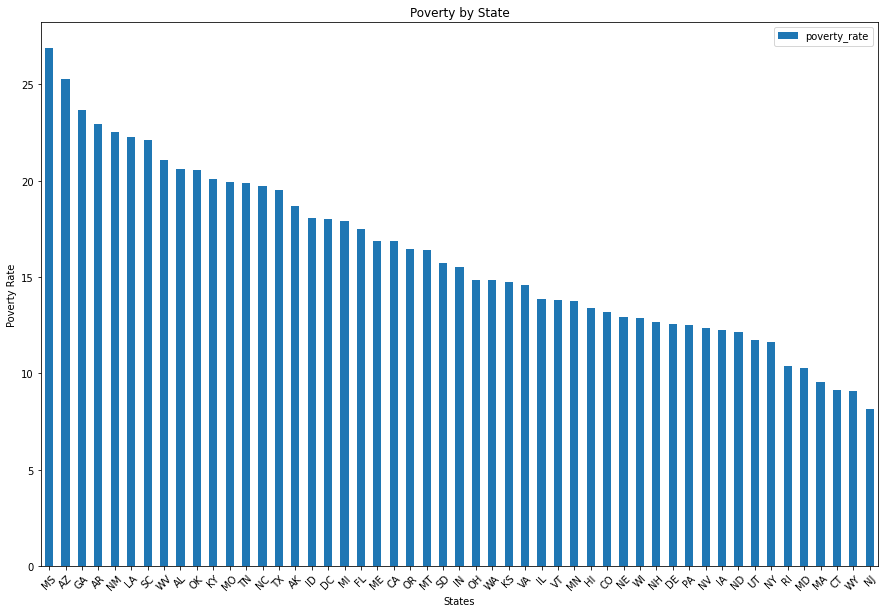

In [415]:
poverty_by_state.sort_values('poverty_rate',
                             ascending=False).plot(kind='bar',
                                                   figsize=(15, 10),
                                                   title='Poverty by State',
                                                   xlabel='States',
                                                   ylabel='Poverty Rate',
                                                   rot=45)

plt.show()

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

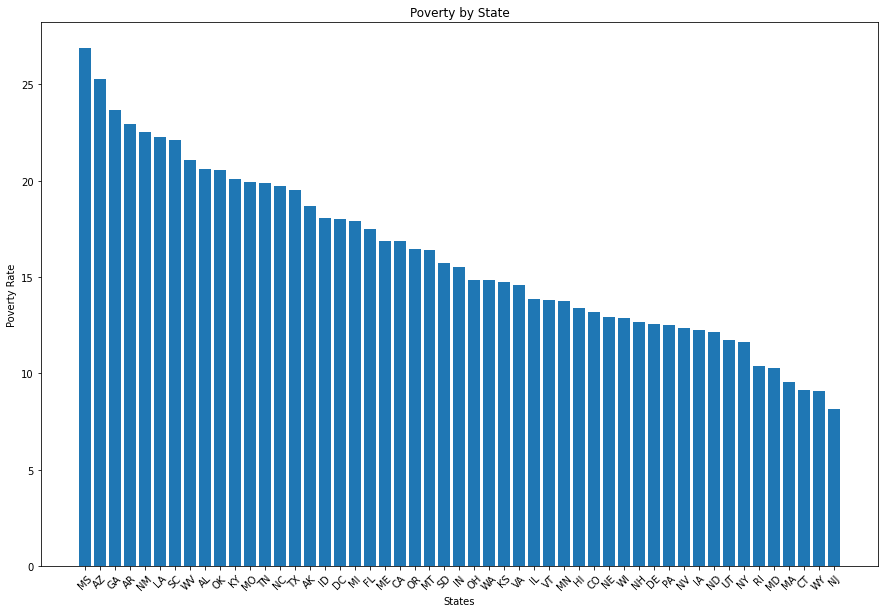

In [416]:
poverty_by_state_sorted = poverty_by_state.sort_values('poverty_rate',
                                                       ascending=False)

fig, ax = plt.subplots()

fig.set_size_inches(15, 10)

ax.bar(poverty_by_state_sorted.reset_index()['Geographic Area'], poverty_by_state_sorted.poverty_rate)
ax.set_title('Poverty by State')
ax.set_xlabel('States')
ax.set_ylabel('Poverty Rate')

plt.xticks(rotation=45)
plt.show()

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

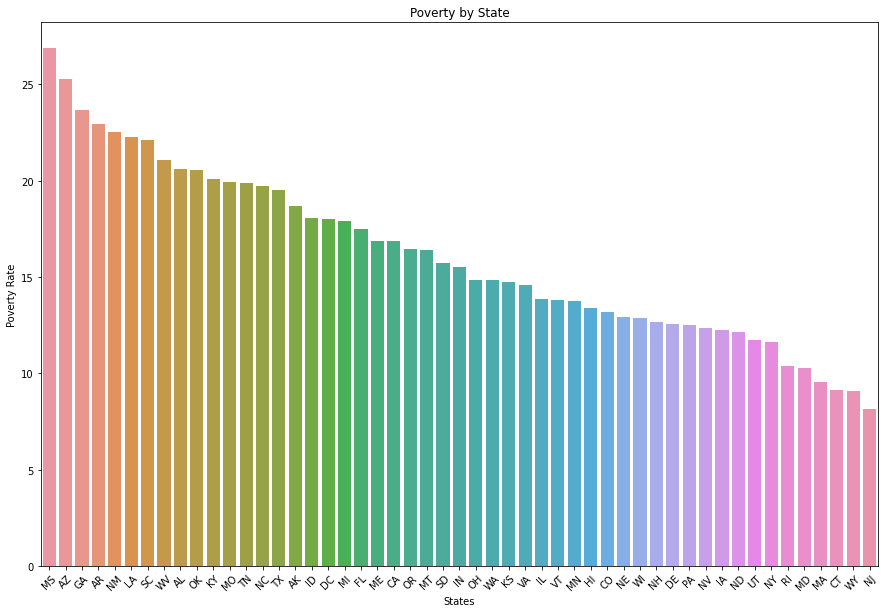

In [417]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 10)

sns.barplot(data=poverty_by_state_sorted.reset_index(),
            x='Geographic Area',
            y='poverty_rate')

ax.set_title('Poverty by State')
ax.set_xlabel('States')
ax.set_ylabel('Poverty Rate')

plt.xticks(rotation=45)
plt.show()

## 2. Most common 15 Name or Surname of killed people 

In [418]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [419]:
kill.name.value_counts()

TK TK                       49
Brandon Jones                2
TK Tk                        2
Daquan Antonio Westbrook     2
Eric Harris                  2
                            ..
Luke Miller                  1
Lorenzo Antoine Cruz         1
Jeffrey R. Nielson           1
Epthen Lamont Johnson        1
Jeremy Dowell                1
Name: name, Length: 2481, dtype: int64

In [420]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [421]:
names, surnames = zip(*pairs)

In [422]:
list(names).count("Lee")

3

In [423]:
Counter(surnames).most_common()[0:15]

[('Lee', 34),
 ('J.', 31),
 ('Smith', 22),
 ('Johnson', 20),
 ('Allen', 18),
 ('A.', 18),
 ('M.', 18),
 ('Michael', 16),
 ('D.', 15),
 ('L.', 15),
 ('Ray', 14),
 ('Joseph', 14),
 ('Thomas', 13),
 ('Scott', 13),
 ('Edward', 11)]

In [424]:
all_names = Counter(names + surnames)

In [425]:
most_common_names = all_names.most_common()[0:15]

In [426]:
most_common_names = pd.DataFrame(most_common_names)

In [427]:
most_common_names

,0,1
0,Michael,91
1,David,57
2,James,56
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,37


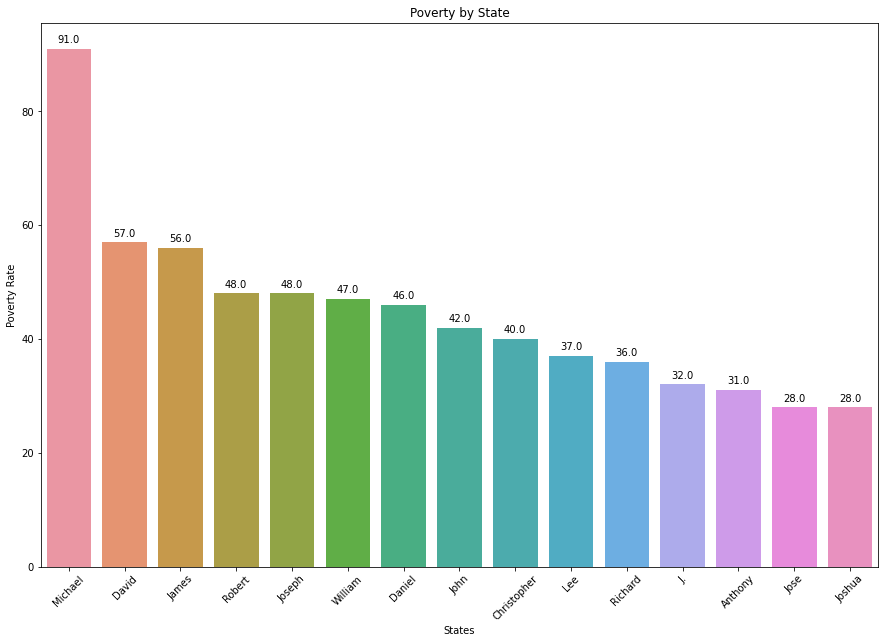

In [428]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 10)

splot = sns.barplot(x=most_common_names[0],
                    y=most_common_names[1])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#for index, value in enumerate(most_common_names[1]):
#   plt.text(index,value,str(value))

ax.set_title('Poverty by State')
ax.set_xlabel('States')
ax.set_ylabel('Poverty Rate')

plt.xticks(rotation=45)
plt.show()

## 3. Killed People According to Races (Pie Chart)

In [429]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [430]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [431]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [432]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [433]:
kill.race.fillna(value='O', inplace=True)

In [434]:
kill.race.isnull().sum()

0

In [435]:
kill_race_ratio = (kill.race.value_counts() / kill.race.value_counts().sum()) * 100

In [436]:
kill_race_ratio.index

Index(['W', 'B', 'H', 'O', 'A', 'N'], dtype='object')

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

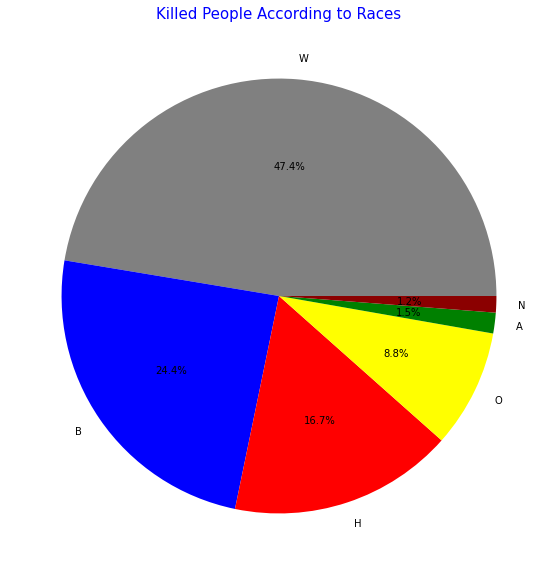

In [437]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 10)


ax.set_title('Killed People According to Races',
             color='Blue',
             fontsize=15)

ax.pie(x=kill_race_ratio,
       labels=kill_race_ratio.index,
       autopct='%1.1f%%',
       colors=['grey', 'blue', 'red', 'yellow', 'green', 'darkred']);

## 4a.Box plot of age in both genders separeted by manner of death.

In [438]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [439]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

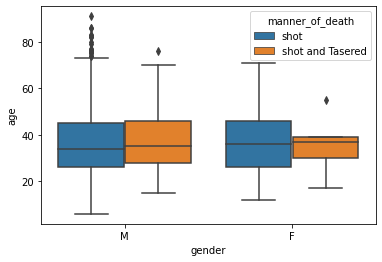

In [440]:
sns.boxplot(x = "gender", y = "age", hue='manner_of_death', data = kill);

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

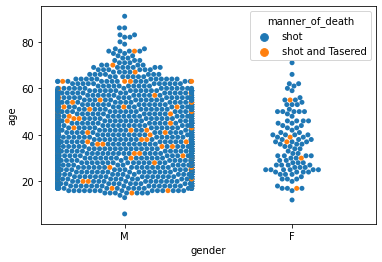

In [441]:
sns.swarmplot(data=kill,
             x='gender',
             y='age',
             hue='manner_of_death');

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

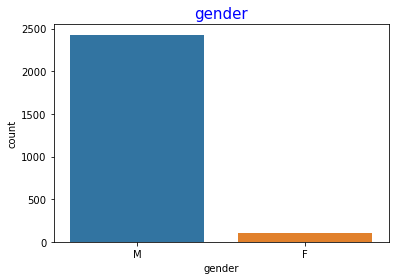

In [442]:
sns.countplot(data=kill, x='gender')

plt.title('gender', color='blue', fontsize=15);

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [443]:
most_common_weapons = pd.DataFrame(Counter(kill.armed).most_common(7))

In [444]:
most_common_weapons

,0,1
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
5,toy weapon,104
6,machete,18


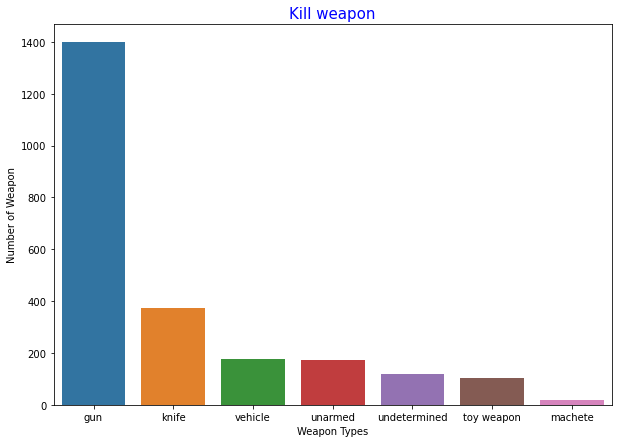

In [445]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 7)


sns.barplot(x=most_common_weapons[0],
            y=most_common_weapons[1])

plt.title('Kill weapon', color='b', fontsize=15)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types');

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [457]:
kill['age_group'] = kill.age.map(lambda x: 'below25' if x<25 else 'above25')

# kill['age25'] = np.where(kill['age']<25,'below25', 'above25')

In [458]:
kill.age_group.unique()

array(['above25', 'below25'], dtype=object)

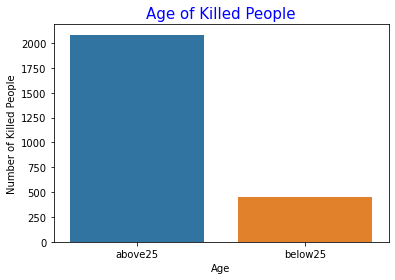

In [459]:
sns.countplot(data=kill, x='age_group')

plt.title('Age of Killed People', fontsize=15, color='b')
plt.xlabel('Age')
plt.ylabel('Number of Killed People');

**INSTRUCTION-4: Plot number of killed poeple by race**

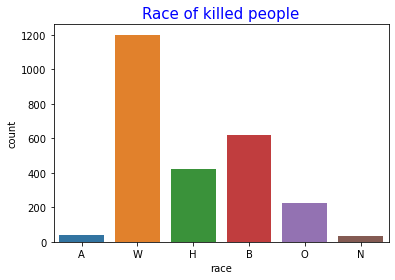

In [464]:
sns.countplot(data=kill, x='race')

plt.title('Race of killed people', color='b', fontsize=15);

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [467]:
most_dangerous_cities = pd.DataFrame(Counter(kill.city).most_common(12))

In [468]:
most_dangerous_cities

,0,1
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


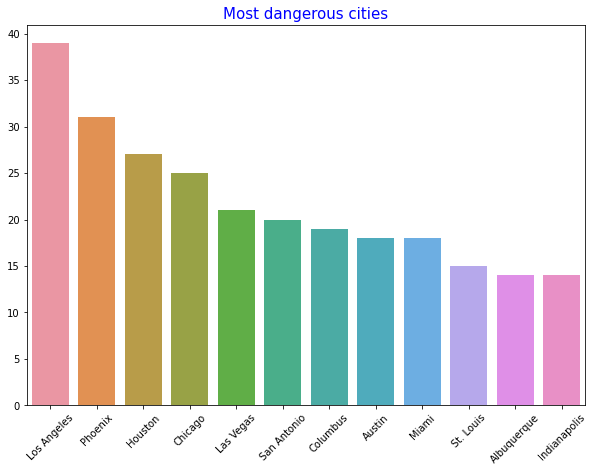

In [479]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 7)

sns.barplot(x=most_dangerous_cities[0], y=most_dangerous_cities[1])

plt.ylabel('')
plt.xlabel('')
plt.title('Most dangerous cities', color='b', fontsize=15)
plt.xticks(rotation=45);

**INSTRUCTION-6: Plot 20 most dangerous states**

In [481]:
most_dangerous_states = pd.DataFrame(Counter(kill.state).most_common(20))

Text(0.5, 1.0, 'Most dangerous states')

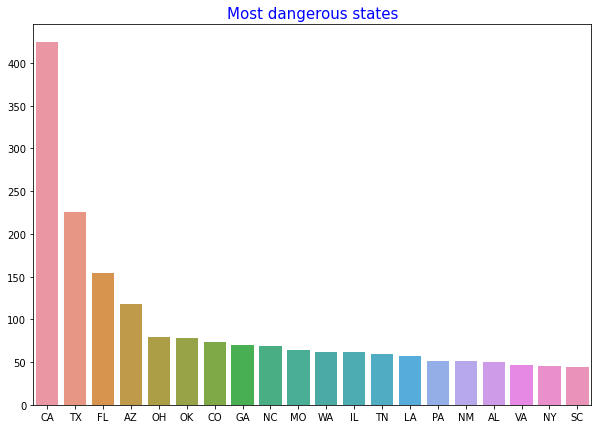

In [482]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 7)

sns.barplot(x=most_dangerous_states[0], y=most_dangerous_states[1])

plt.ylabel('')
plt.xlabel('')
plt.title('Most dangerous states', color='b', fontsize=15)

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

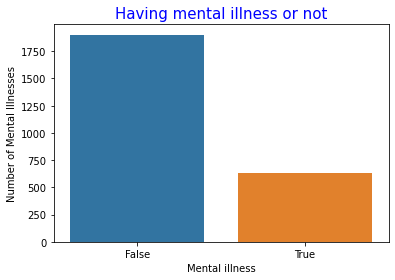

In [491]:
sns.countplot(data=kill, x='signs_of_mental_illness')

plt.xlabel('Mental illness')
plt.ylabel('Number of Mental Illnesses');
plt.title('Having mental illness or not', color='b', fontsize=15);

**INSTRUCTION-8: Plot number of Threat Types**

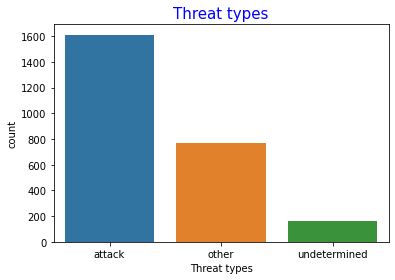

In [496]:
sns.countplot(data=kill, x='threat_level')

plt.title('Threat types', color='b', fontsize=15)
plt.xlabel('Threat types');

**INSTRUCTION-9: Plot number of Flee Types**

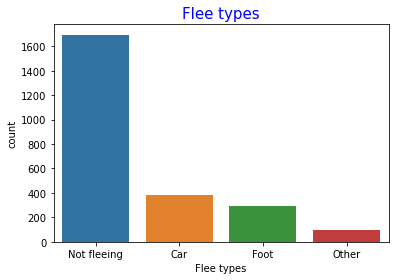

In [501]:
sns.countplot(data=kill, x='flee')

plt.title('Flee types', color='b', fontsize=15)
plt.xlabel('Flee types');